In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/Intern_Dataset/House_prices.csv')

In [3]:
data.head()

,date,price,Rooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Location
0,5/9/2014 0:00,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,Urban
1,5/9/2014 0:00,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA,Rural
2,5/9/2014 0:00,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA,Suburban
3,5/9/2014 0:00,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,Urban
4,5/10/2014 0:00,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA,Rural


In [4]:
data = data.drop(columns = ['date','bathrooms','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip','country'])

In [5]:
data.head()

,price,Rooms,sqft_living,Location
0,376000.0,3,1340,Urban
1,800000.0,4,3540,Rural
2,2238888.0,5,7270,Suburban
3,324000.0,3,998,Urban
4,549900.0,5,3060,Rural


In [6]:
data.isnull().sum()

price          0
Rooms          0
sqft_living    0
Location       0
dtype: int64

In [7]:
data.shape

(4140, 4)

In [9]:
duplicates = data.duplicated()
print(duplicates.sum())
# There are 10 duplicate values

10


In [7]:
data = data.drop_duplicates()

In [8]:
rem_duplicate = data.duplicated()
print(rem_duplicate.sum())
# Duplicate entries have been removed

0


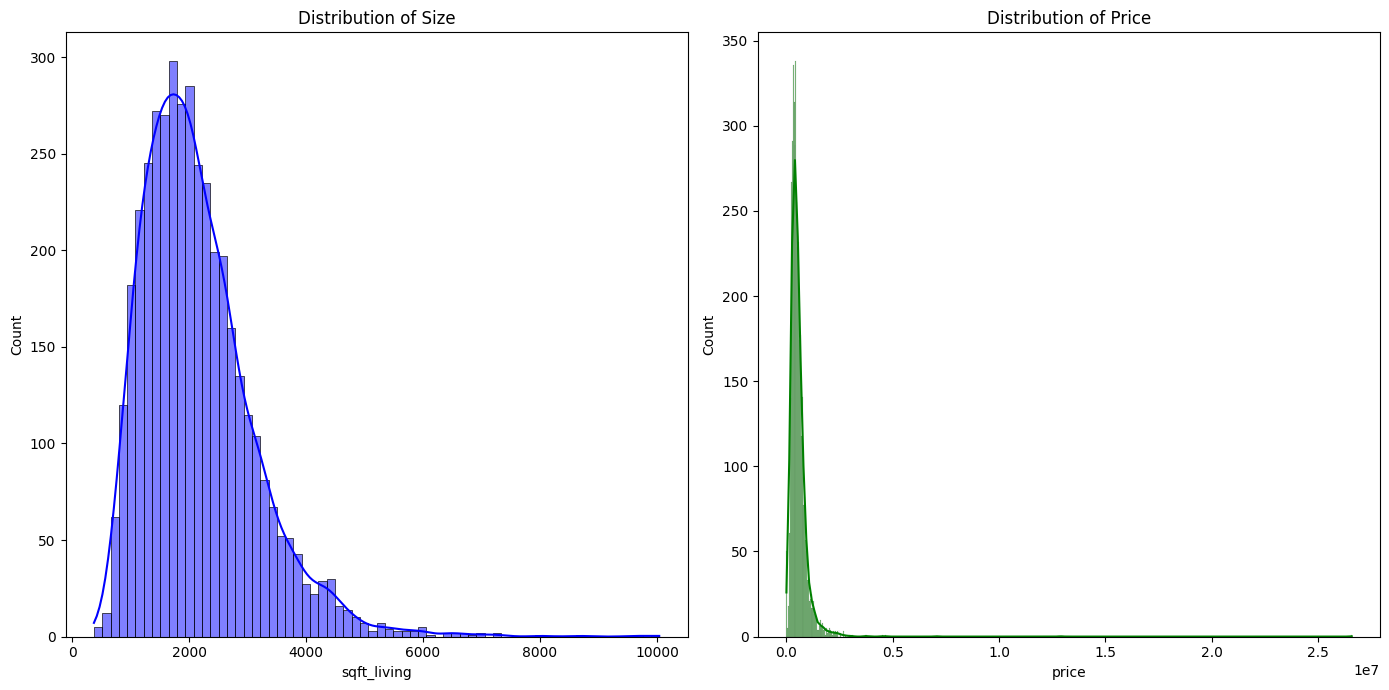

In [15]:
plt.figure(figsize = (14,7))

plt.subplot(1,2,1)
sns.histplot(data['sqft_living'],kde=True,color='blue')
plt.title('Distribution of Size')

plt.subplot(1,2,2)
sns.histplot(data['price'],kde=True,color='green')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [9]:
# 
Q1_size = data['sqft_living'].quantile(0.25)
Q3_size = data['sqft_living'].quantile(0.75)
IQR_size = Q3_size - Q1_size

Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate outlier boundaries for Size and Price
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers using IQR method
outliers_iqr = data[(data['sqft_living'] < lower_bound_size) | (data['sqft_living'] > upper_bound_size) | 
                  (data['price'] < lower_bound_price) | (data['price'] > upper_bound_price)]

# Display outliers
print(outliers_iqr)


            price  Rooms  sqft_living  Location
2     2238888.000      5         7270  Suburban
11    1225000.000      4         5420     Urban
18    1200000.000      3         1560     Urban
20     900000.000      4         4700     Rural
22    1575000.000      5         3650  Suburban
...           ...    ...          ...       ...
4007  1337044.200      4         4280     Rural
4063        0.000      3         5230     Urban
4068        0.000      4         4550     Rural
4112  1288333.333      6         3830     Rural
4115        0.000      5         8020     Rural

[269 rows x 4 columns]


In [31]:
data_clean = data[(data['sqft_living'] >= lower_bound_size) & (data['sqft_living'] <= upper_bound_size) &
                (data['price'] >= lower_bound_price) & (data['price'] <= upper_bound_price)]

data_clean.to_csv('clean_dataset.csv', index=False)

# Dataset has been cleaned from the outliers 
print(data_clean)

            price  Rooms  sqft_living  Location
0     376000.0000      3         1340     Urban
1     800000.0000      4         3540     Rural
3     324000.0000      3          998     Urban
4     549900.0000      5         3060     Rural
5     320000.0000      3         2130     Urban
...           ...    ...          ...       ...
4135  308166.6667      3         1510     Urban
4136  534333.3333      3         1460     Urban
4137  416904.1667      3         3010  Suburban
4138  203400.0000      4         2090  Suburban
4139  220600.0000      3         1490  Suburban

[3861 rows x 4 columns]


In [12]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standardized = standard_scaler.fit_transform(data_clean[['sqft_living','Rooms']])
print("Standard Scaled Data : \n",standardized)

# The features are in scale and are in comparable range

Standard Scaled Data : 
 [[-0.88115223 -0.39540886]
 [ 2.02916697  0.74135481]
 [-1.33357458 -0.39540886]
 ...
 [ 1.32804462 -0.39540886]
 [ 0.11100205  0.74135481]
 [-0.68272137 -0.39540886]]


In [15]:
data_encoded = pd.get_dummies(data_clean, columns = ['Location'], dtype = int)
print(data_encoded.head())
# Used One-Hot Encoding for non-original category

      price  Rooms  sqft_living  Location_Rural  Location_Suburban  \
0  376000.0      3         1340               0                  0   
1  800000.0      4         3540               1                  0   
3  324000.0      3          998               0                  0   
4  549900.0      5         3060               1                  0   
5  320000.0      3         2130               0                  0   

   Location_Urban  
0               1  
1               0  
3               1  
4               0  
5               1  


In [18]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Show the correlation matrix
print(corr_matrix)

# Identify correlations with the target variable 'Price'
target = corr_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with Price:\n", target)

                      price     Rooms  sqft_living  Location_Rural  \
price              1.000000  0.271309     0.585941        0.039342   
Rooms              0.271309  1.000000     0.599881        0.020025   
sqft_living        0.585941  0.599881     1.000000        0.022399   
Location_Rural     0.039342  0.020025     0.022399        1.000000   
Location_Suburban -0.048117 -0.037660    -0.046825       -0.490733   
Location_Urban     0.008746  0.017508     0.024244       -0.503724   

                   Location_Suburban  Location_Urban  
price                      -0.048117        0.008746  
Rooms                      -0.037660        0.017508  
sqft_living                -0.046825        0.024244  
Location_Rural             -0.490733       -0.503724  
Location_Suburban           1.000000       -0.505500  
Location_Urban             -0.505500        1.000000  

Correlation with Price:
 price                1.000000
sqft_living          0.585941
Rooms                0.271309
Location

In [19]:
threshold = 0.1

imp_feature = corr_matrix['price'][abs(corr_matrix['price']) >= threshold].index.tolist()

data_clean = data_clean[imp_feature]

print("Selected features : ", imp_feature)

Selected features :  ['price', 'Rooms', 'sqft_living']


In [20]:
low_impact_features = corr_matrix['price'][abs(corr_matrix['price']) < 0.1].index.tolist()
print("Low impact features to remove : ", low_impact_features)

Low impact features to remove :  ['Location_Rural', 'Location_Suburban', 'Location_Urban']


In [21]:
data_encoded = data_encoded.drop(columns = low_impact_features)
print("Features after removal : ", data_encoded.columns.tolist())

Features after removal :  ['price', 'Rooms', 'sqft_living']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
x = data_encoded[['sqft_living','Rooms']]
y = data_encoded['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Training Data shape : ",x_train.shape)
print("Testing Data shape : ",x_test.shape)

Training Data shape :  (3088, 2)
Testing Data shape :  (773, 2)


In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train , y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())
# Making predictions using the model

           Actual      Predicted
2592  430000.0000  319091.103420
3529  266000.0000  455219.884301
2751  358000.0000  451836.196885
2176  499500.0000  674146.168761
3990  596165.4286  567333.102877


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
# Evaluation metrics are displayed as follows

Root Mean Squared Error (RMSE): 168319.64
R² Score: 0.3680


In [33]:
# 
Q1_size = data_clean['sqft_living'].quantile(0.25)
Q3_size = data_clean['sqft_living'].quantile(0.75)
IQR_size = Q3_size - Q1_size

Q1_price = data_clean['price'].quantile(0.25)
Q3_price = data_clean['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate outlier boundaries for Size and Price
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers using IQR method
outliers_iqr = data_clean[(data_clean['sqft_living'] < lower_bound_size) | (data_clean['sqft_living'] > upper_bound_size) | 
                  (data_clean['price'] < lower_bound_price) | (data_clean['price'] > upper_bound_price)]

# Display outliers
print(outliers_iqr)


          price  Rooms  sqft_living  Location
137   1105000.0      4         2740     Rural
232   1058000.0      4         2290     Rural
293   1085000.0      4         3740  Suburban
442    869000.0      5         4180     Rural
526   1125000.0      6         2880     Urban
...         ...    ...          ...       ...
3742  1065000.0      4         4260     Rural
3792   734950.0      4         4280     Rural
3929        0.0      4         4210     Urban
3968   435000.0      4         4260     Urban
4085   405125.0      4         4230  Suburban

[69 rows x 4 columns]


In [34]:
data_cleaner = data_clean[(data_clean['sqft_living'] >= lower_bound_size) & (data_clean['sqft_living'] <= upper_bound_size) &
                (data_clean['price'] >= lower_bound_price) & (data_clean['price'] <= upper_bound_price)]

data_cleaner.to_csv('cleaner_dataset.csv', index=False)

# Dataset has been cleaned from the outliers 
print(data_cleaner)

            price  Rooms  sqft_living  Location
0     376000.0000      3         1340     Urban
1     800000.0000      4         3540     Rural
3     324000.0000      3          998     Urban
4     549900.0000      5         3060     Rural
5     320000.0000      3         2130     Urban
...           ...    ...          ...       ...
4135  308166.6667      3         1510     Urban
4136  534333.3333      3         1460     Urban
4137  416904.1667      3         3010  Suburban
4138  203400.0000      4         2090  Suburban
4139  220600.0000      3         1490  Suburban

[3792 rows x 4 columns]


In [35]:
# 
Q1_size = data_cleaner['sqft_living'].quantile(0.25)
Q3_size = data_cleaner['sqft_living'].quantile(0.75)
IQR_size = Q3_size - Q1_size

Q1_price = data_cleaner['price'].quantile(0.25)
Q3_price = data_cleaner['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate outlier boundaries for Size and Price
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers using IQR method
outliers_iqr = data_cleaner[(data_cleaner['sqft_living'] < lower_bound_size) | (data_cleaner['sqft_living'] > upper_bound_size) | 
                  (data_cleaner['price'] < lower_bound_price) | (data_cleaner['price'] > upper_bound_price)]

# Display outliers
print(outliers_iqr)


          price  Rooms  sqft_living  Location
83    1050000.0      4         3280     Rural
679   1050000.0      4         3440     Urban
740   1050000.0      4         3030     Rural
748   1051000.0      4         3860     Rural
812    900000.0      3         4080     Urban
870   1050000.0      4         2920     Urban
1414   603500.0      4         4060     Urban
1986   845000.0      4         4070  Suburban
2943  1050000.0      4         3450     Rural
2958   910000.0      4         4040  Suburban
3327   920000.0      4         4080  Suburban
3367  1038000.0      4         1440     Rural
3521   670000.0      6         4050  Suburban
3643  1050000.0      4         2250  Suburban
3714   989000.0      5         4030  Suburban
3956   316850.0      4         4060  Suburban
4012        0.0      4         4060  Suburban
4034  1036200.0      4         2500     Urban
4107        0.0      4         4080  Suburban
